In [1050]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

In [1137]:
raw_data = pd.read_csv("data.csv")

In [1138]:
raw_data

,Announce Date,Company,Industry,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Total Voting (MM),Votes per Superior,...,Subject to Shareholder Vote,Stock Change 1-day %,Stock Change 10-day %,Public Float Pre (MM),Public Float Post (MM),% Float Change,Volume Pre (000s),Vol 3mo %,Vol 6mo %,Vol 1yr %
0,31-May-06,Extendicare,REIT,No,No,1884.0,57.1,11.80,68.9,10.0,...,Yes,-6.3,-10.4,57.0,61.0,6.6,307.0,11.0,51.0,32.0
1,14-May-06,Canam Group,Building Products,Yes,No,430.0,47.1,7.00,54.1,5.0,...,Yes,5.9,15.5,57.0,57.0,0.0,81.0,94.0,34.0,21.0
2,13-Dec-05,CoolBrands,Branded Food,Yes,No,50.0,50.0,6.00,56.0,10.0,...,Yes,1.9,14.9,36.0,36.0,0.0,388.0,-74.0,-55.0,-26.0
3,14-Sep-05,ProMetic Life Sciences,Healthcare,Yes,No,51.0,116.5,13.00,129.5,10.0,...,Yes,4.3,-12.8,116.0,116.0,0.0,146.0,69.0,28.0,4.0
4,31-Mar-05,DizA Resources,Metals,Yes,No,41.0,53.8,6.00,61.1,10.0,...,Yes,1.4,-1.4,36.0,37.0,2.0,128.0,-24.0,-20.0,14.0
5,26-Feb-04,MDC Partners,Media,Yes,No,365.0,18.6,0.10,20.5,20.0,...,Yes,1.7,12.5,19.0,19.0,0.0,109.0,-37.0,-2.0,-23.0
6,7-Feb-04,Gildan,Retail,Yes,No,590.0,23.4,6.10,29.5,8.0,...,No,0.9,9.8,23.0,24.0,4.5,381.0,-24.0,15.0,28.0
7,17-Oct-03,Sino-Forest,Metals,Yes,No,277.0,84.2,6.00,90.7,5.0,...,No,7.5,5.5,130.0,888.0,552.0,142.0,633.0,552.0,391.0
8,7-May-03,Sceptre,Financial,No,No,64.0,13.6,0.05,13.6,NaN,...,Yes,7.4,29.8,13.0,13.0,0.0,15.0,9.0,3.0,21.0
9,2-Aug-00,Goldcorp,Metals & Mining,No,No,728.0,74.5,5.50,78.1,10.0,...,Yes,8.4,18.0,74.0,76.0,3.0,1669.0,-3.0,-12.0,33.0


In [1139]:
raw_data = raw_data.drop(8).reset_index(drop=True)

In [1140]:
raw_data

,Announce Date,Company,Industry,Coattail,Sunset,Market Cap (C$ MM),Subordinate Voting (MM),Superior Voting (MM),Total Voting (MM),Votes per Superior,...,Subject to Shareholder Vote,Stock Change 1-day %,Stock Change 10-day %,Public Float Pre (MM),Public Float Post (MM),% Float Change,Volume Pre (000s),Vol 3mo %,Vol 6mo %,Vol 1yr %
0,31-May-06,Extendicare,REIT,No,No,1884.0,57.1,11.8,68.9,10.0,...,Yes,-6.3,-10.4,57.0,61.0,6.6,307.0,11.0,51.0,32.0
1,14-May-06,Canam Group,Building Products,Yes,No,430.0,47.1,7.0,54.1,5.0,...,Yes,5.9,15.5,57.0,57.0,0.0,81.0,94.0,34.0,21.0
2,13-Dec-05,CoolBrands,Branded Food,Yes,No,50.0,50.0,6.0,56.0,10.0,...,Yes,1.9,14.9,36.0,36.0,0.0,388.0,-74.0,-55.0,-26.0
3,14-Sep-05,ProMetic Life Sciences,Healthcare,Yes,No,51.0,116.5,13.0,129.5,10.0,...,Yes,4.3,-12.8,116.0,116.0,0.0,146.0,69.0,28.0,4.0
4,31-Mar-05,DizA Resources,Metals,Yes,No,41.0,53.8,6.0,61.1,10.0,...,Yes,1.4,-1.4,36.0,37.0,2.0,128.0,-24.0,-20.0,14.0
5,26-Feb-04,MDC Partners,Media,Yes,No,365.0,18.6,0.1,20.5,20.0,...,Yes,1.7,12.5,19.0,19.0,0.0,109.0,-37.0,-2.0,-23.0
6,7-Feb-04,Gildan,Retail,Yes,No,590.0,23.4,6.1,29.5,8.0,...,No,0.9,9.8,23.0,24.0,4.5,381.0,-24.0,15.0,28.0
7,17-Oct-03,Sino-Forest,Metals,Yes,No,277.0,84.2,6.0,90.7,5.0,...,No,7.5,5.5,130.0,888.0,552.0,142.0,633.0,552.0,391.0
8,2-Aug-00,Goldcorp,Metals & Mining,No,No,728.0,74.5,5.5,78.1,10.0,...,Yes,8.4,18.0,74.0,76.0,3.0,1669.0,-3.0,-12.0,33.0
9,23-Dec-99,MDS Inc.,Healthcare,Yes,No,1682.0,47.3,12.3,59.6,NaN,...,Yes,2.0,19.4,47.0,56.0,18.4,142.0,63.0,62.0,106.0


In [1141]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Announce Date                13 non-null     object 
 1   Company                      14 non-null     object 
 2   Industry                     14 non-null     object 
 3   Coattail                     14 non-null     object 
 4   Sunset                       14 non-null     object 
 5   Market Cap (C$ MM)           14 non-null     float64
 6   Subordinate Voting (MM)      14 non-null     float64
 7   Superior Voting (MM)         14 non-null     float64
 8   Total Voting (MM)            14 non-null     float64
 9   Votes per Superior           10 non-null     float64
 10  Sup-Econ %                   14 non-null     float64
 11  Sup-Vote %                   14 non-null     float64
 12  Sup Vote-Con Econ            14 non-null     float64
 13  Sup Vote/Econ         

In [1142]:
#data = raw_data[["Company","Coattail","Sunset","Market Cap (C$ MM)","Subordinate Voting (MM)", "Superior Voting (MM)","Sup Vote/Econ","Stock Change 10-day %"]]
#data = raw_data[["Company","Coattail","Market Cap (C$ MM)","Sup Vote/Econ","Stock Change 10-day %"]]
data = raw_data[["Company","Coattail","Market Cap (C$ MM)","Sup Vote/Econ","Premium %"]]

In [1143]:
data

,Company,Coattail,Market Cap (C$ MM),Sup Vote/Econ,Premium %
0,Extendicare,No,1884.0,3.9,7.5
1,Canam Group,Yes,430.0,47.3,343.4
2,CoolBrands,Yes,50.0,5.1,0.0
3,ProMetic Life Sciences,Yes,51.0,5.2,0.0
4,DizA Resources,Yes,41.0,7.4,0.0
5,MDC Partners,Yes,365.0,13.6,0.0
6,Gildan,Yes,590.0,3.3,0.0
7,Sino-Forest,Yes,277.0,3.9,0.0
8,Goldcorp,No,728.0,6.2,42.0
9,MDS Inc.,Yes,1682.0,4.8,5.0


In [1144]:
#data["Total Voting (MM)"] = data["Superior Voting (MM)"] + data["Subordinate Voting (MM)"]

In [1145]:
#data.iloc[:,-1] = data.iloc[:,-1] /100

In [1146]:
data.describe(include="all")

,Company,Coattail,Market Cap (C$ MM),Sup Vote/Econ,Premium %
count,14,14,14.000000,14.000000,13.000000
unique,14,2,NaN,NaN,NaN
top,Extendicare,Yes,NaN,NaN,NaN
freq,1,10,NaN,NaN,NaN
mean,NaN,NaN,1419.857143,15.792857,32.915385
std,NaN,NaN,2332.754227,27.367934,94.001027
min,NaN,NaN,41.000000,3.300000,0.000000
25%,NaN,NaN,139.750000,4.800000,0.000000
50%,NaN,NaN,397.500000,5.700000,5.000000
75%,NaN,NaN,1443.500000,7.250000,10.000000


In [1147]:
data["Coattail"] = data["Coattail"].map({"Yes": 1, "No": 0})
#data["Sunset"]   = data["Sunset"].map({"Yes": 1, "No": 0})

C:\Users\rohan\AppData\Local\Temp\ipykernel_19956\1782905199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Coattail"] = data["Coattail"].map({"Yes": 1, "No": 0})


In [1148]:
MAGNA = data[data["Company"] == "Magna"].copy()

In [1149]:
data = data.dropna().reset_index(drop=True)
#data = data.drop(12)

In [1150]:
data.describe(include="all")

,Company,Coattail,Market Cap (C$ MM),Sup Vote/Econ,Premium %
count,13,13.000000,13.000000,13.000000,13.000000
unique,13,NaN,NaN,NaN,NaN
top,Extendicare,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,0.769231,961.461538,9.130769,32.915385
std,NaN,0.438529,1645.691882,11.758925,94.001027
min,NaN,0.000000,41.000000,3.300000,0.000000
25%,NaN,1.000000,112.000000,4.800000,0.000000
50%,NaN,1.000000,365.000000,5.200000,5.000000
75%,NaN,1.000000,728.000000,6.800000,10.000000


In [1151]:
data.isnull().sum()     # count of missing values per column

Company               0
Coattail              0
Market Cap (C$ MM)    0
Sup Vote/Econ         0
Premium %             0
dtype: int64

In [1152]:
data

,Company,Coattail,Market Cap (C$ MM),Sup Vote/Econ,Premium %
0,Extendicare,0,1884.0,3.9,7.5
1,Canam Group,1,430.0,47.3,343.4
2,CoolBrands,1,50.0,5.1,0.0
3,ProMetic Life Sciences,1,51.0,5.2,0.0
4,DizA Resources,1,41.0,7.4,0.0
5,MDC Partners,1,365.0,13.6,0.0
6,Gildan,1,590.0,3.3,0.0
7,Sino-Forest,1,277.0,3.9,0.0
8,Goldcorp,0,728.0,6.2,42.0
9,MDS Inc.,1,1682.0,4.8,5.0


# Training

In [1153]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

In [1154]:
X

,Coattail,Market Cap (C$ MM),Sup Vote/Econ
0,0,1884.0,3.9
1,1,430.0,47.3
2,1,50.0,5.1
3,1,51.0,5.2
4,1,41.0,7.4
5,1,365.0,13.6
6,1,590.0,3.3
7,1,277.0,3.9
8,0,728.0,6.2
9,1,1682.0,4.8


In [1155]:
Y

0       7.5
1     343.4
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8      42.0
9       5.0
10     15.0
11      5.0
12     10.0
Name: Premium %, dtype: float64

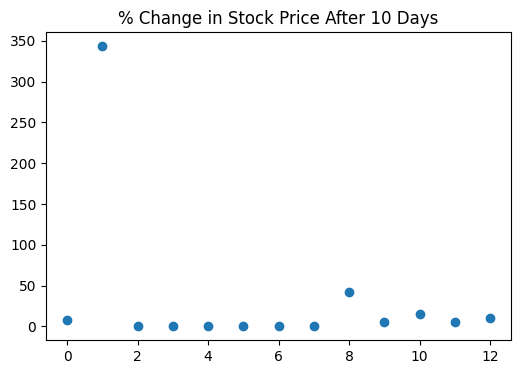

In [1156]:
Y.plot(style="o", figsize=(6,4), title="% Change in Stock Price After 10 Days")
plt.show()

# Visually it's clear that regression is not a suitable learner for this data

In [1157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [1158]:
#scaler = MinMaxScaler()
scaler = RobustScaler()
#scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [1159]:
model = LinearRegression()
model.fit(X_scaled,Y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_scaled)
print("MSE:", mean_squared_error(Y, y_pred))
print("MAE :", mean_absolute_error(Y, y_pred))

results = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values ,   # actual
    "y_pred": y_pred    # predicted
})
results["error"] = results["y_true"] - results["y_pred"]
results["abs_error"] = results["error"].abs()
results



Intercept: -2.818362156776253
Coefficients: [-30.34018855  -2.29927327  15.75188329]
MSE: 428.8965781694226
MAE : 13.719626321061712


,Company,y_true,y_pred,error,abs_error
0,Extendicare,7.5,11.613303,-4.113303,4.113303
1,Canam Group,343.4,328.516163,14.883837,14.883837
2,CoolBrands,0.0,-2.430192,2.430192,2.430192
3,ProMetic Life Sciences,0.0,-1.646330,1.646330,1.646330
4,DizA Resources,0.0,15.718067,-15.718067,15.718067
5,MDC Partners,0.0,63.339548,-63.339548,63.339548
6,Gildan,0.0,-18.622483,18.622483,18.622483
7,Sino-Forest,0.0,-12.728619,12.728619,12.728619
8,Goldcorp,42.0,34.042839,7.957161,7.957161
9,MDS Inc.,5.0,-10.884555,15.884555,15.884555


In [1160]:
N_NEIGHBORS = 4

In [1161]:
knn_model = KNeighborsRegressor(n_neighbors=N_NEIGHBORS)  
knn_model.fit(X_scaled, Y)
y_pred_knn = knn_model.predict(X_scaled)

print("MSE:", mean_squared_error(Y, y_pred_knn))
print("MAE:", mean_absolute_error(Y, y_pred_knn))

results_knn = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_knn
})
results_knn["error"] = results_knn["y_true"] - results_knn["y_pred"]
results_knn["abs_error"] = results_knn["error"].abs()
results_knn

MSE: 5140.003798076921
MAE: 25.89807692307692


,Company,y_true,y_pred,error,abs_error
0,Extendicare,7.5,13.625,-6.125,6.125
1,Canam Group,343.4,87.100,256.300,256.300
2,CoolBrands,0.0,2.500,-2.500,2.500
3,ProMetic Life Sciences,0.0,3.750,-3.750,3.750
4,DizA Resources,0.0,1.250,-1.250,1.250
5,MDC Partners,0.0,11.750,-11.750,11.750
6,Gildan,0.0,2.500,-2.500,2.500
7,Sino-Forest,0.0,2.500,-2.500,2.500
8,Goldcorp,42.0,14.250,27.750,27.750
9,MDS Inc.,5.0,13.625,-8.625,8.625


In [1162]:
N_ESTIMATORS = 10

In [1163]:
rf_model = RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=42)
rf_model.fit(X, Y)
y_pred_rf = rf_model.predict(X)

print("MSE:", mean_squared_error(Y, y_pred_rf))
print("MAE:", mean_absolute_error(Y, y_pred_rf))

results_rf = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_rf
})
results_rf["error"] = results_rf["y_true"] - results_rf["y_pred"]
results_rf["abs_error"] = results_rf["error"].abs()
results_rf


MSE: 2261.02173076923
MAE: 16.44230769230769


,Company,y_true,y_pred,error,abs_error
0,Extendicare,7.5,14.90,-7.40,7.40
1,Canam Group,343.4,172.70,170.70,170.70
2,CoolBrands,0.0,1.00,-1.00,1.00
3,ProMetic Life Sciences,0.0,1.00,-1.00,1.00
4,DizA Resources,0.0,5.20,-5.20,5.20
5,MDC Partners,0.0,5.20,-5.20,5.20
6,Gildan,0.0,1.00,-1.00,1.00
7,Sino-Forest,0.0,1.50,-1.50,1.50
8,Goldcorp,42.0,31.65,10.35,10.35
9,MDS Inc.,5.0,8.70,-3.70,3.70


In [1164]:
importances = rf_model.feature_importances_
features = X.columns

feat_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(feat_importance_df)

              Feature  Importance
2       Sup Vote/Econ    0.521111
0            Coattail    0.244348
1  Market Cap (C$ MM)    0.234541


In [1165]:
MAX_DEPTH = 3

In [1166]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=MAX_DEPTH)
dt_model.fit(X, Y)
y_pred_dt = dt_model.predict(X)

print("MSE:", mean_squared_error(Y, y_pred_dt))
print("MAE:", mean_absolute_error(Y, y_pred_dt))

results_dt = pd.DataFrame({
    "Company": data["Company"].values,
    "y_true": Y.values,
    "y_pred": y_pred_dt
})
results_dt["error"] = results_dt["y_true"] - results_dt["y_pred"]
results_dt["abs_error"] = results_dt["error"].abs()
results_dt

MSE: 8.573717948717947
MAE: 2.1153846153846154


,Company,y_true,y_pred,error,abs_error
0,Extendicare,7.5,11.250000,-3.750000,3.750000
1,Canam Group,343.4,343.400000,0.000000,0.000000
2,CoolBrands,0.0,0.000000,0.000000,0.000000
3,ProMetic Life Sciences,0.0,0.000000,0.000000,0.000000
4,DizA Resources,0.0,0.000000,0.000000,0.000000
5,MDC Partners,0.0,3.333333,-3.333333,3.333333
6,Gildan,0.0,3.333333,-3.333333,3.333333
7,Sino-Forest,0.0,3.333333,-3.333333,3.333333
8,Goldcorp,42.0,42.000000,0.000000,0.000000
9,MDS Inc.,5.0,3.333333,1.666667,1.666667


In [1167]:

"""
plt.figure(figsize=(20,10)) 
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=9  
)
"""
#plt.savefig("dt.png", dpi=300, bbox_inches="tight") 
#plt.show()
#plt.close() 

'\nplt.figure(figsize=(20,10)) \ntree.plot_tree(\n    dt_model,\n    feature_names=X.columns,\n    filled=True,\n    rounded=True,\n    fontsize=9  \n)\n'

In [1168]:
loo = LeaveOneOut()

models = {
    "LinearRegression": Pipeline([
        ("model", LinearRegression())
    ]),
    "KNN": Pipeline([
        ("model", KNeighborsRegressor(n_neighbors=N_NEIGHBORS))
    ]),
    "RandomForest": RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42,max_depth=MAX_DEPTH)
}


mae_scores = {}
preds_by_model = {}

for name, mdl in models.items():
    if mdl == "KNN" or mdl == "LinearRegression":
        y_pred = cross_val_predict(mdl, X_scaled, Y, cv=loo)
    else:
        y_pred = cross_val_predict(mdl, X, Y, cv=loo)
    preds_by_model[name] = y_pred
    mae = mean_absolute_error(Y, y_pred)
    mae_scores[name] = mae


print("LOOCV MAE by model:")
for name, mae in mae_scores.items():
    print(f"  {name:>14}: {mae:.4f}")

# (Optional) inspect per-point predictions for a model
# results = pd.DataFrame({"y_true": Y.values, "y_pred": preds_by_model["RandomForest"]})
# results["abs_err"] = (results["y_true"] - results["y_pred"]).abs()
# print(results)


LOOCV MAE by model:
  LinearRegression: 43.3761
             KNN: 66.6346
    RandomForest: 39.8215
    DecisionTree: 35.8467


# Inference

In [1169]:
MAGNA

,Company,Coattail,Market Cap (C$ MM),Sup Vote/Econ,Premium %
13,Magna,0,7379.0,102.4,NaN


In [1170]:
#MAGNA_X = MAGNA.iloc[:,1:-1]
MAGNA_X = MAGNA.loc[MAGNA["Company"]=="Magna", X.columns]
MAGNA_SCALED = pd.DataFrame(scaler.transform(MAGNA_X),columns=X.columns)

In [1171]:
MAGNA_SCALED

,Coattail,Market Cap (C$ MM),Sup Vote/Econ
0,-1.0,11.386364,48.6


In [1172]:
rf_pred = rf_model.predict(MAGNA_X)
knn_pred = knn_model.predict(MAGNA_SCALED)
reg_pred = model.predict(MAGNA_SCALED)
print(f"RF: {rf_pred}")
print(f"KNN: {knn_pred}")
print(f"Regression: {reg_pred}")

RF: [179.2]
KNN: [89.6]
Regression: [766.88299256]


In [1173]:
distances, indices = knn_model.kneighbors(MAGNA_SCALED, n_neighbors=len(X_scaled))

print("Neighbor ordering by distance:")
for rank, (idx, dist) in enumerate(zip(indices[0], distances[0]), start=1):
    print(f"{rank}. {data.iloc[idx]['Company']}, Distance={dist:.3f}, 10 Day Stock Change %={Y.iloc[idx]}")

Neighbor ordering by distance:
1. Canam Group, Distance=29.787, 10 Day Stock Change %=343.4
2. MDC Partners, Distance=45.848, 10 Day Stock Change %=0.0
3. Laidlaw, Distance=47.848, 10 Day Stock Change %=15.0
4. DizA Resources, Distance=48.981, 10 Day Stock Change %=0.0
5. Goldcorp, Distance=49.297, 10 Day Stock Change %=42.0
6. Agra, Distance=49.396, 10 Day Stock Change %=5.0
7. MDS Inc., Distance=49.679, 10 Day Stock Change %=5.0
8. ProMetic Life Sciences, Distance=50.045, 10 Day Stock Change %=0.0
9. Extendicare, Distance=50.051, 10 Day Stock Change %=7.5
10. CoolBrands, Distance=50.094, 10 Day Stock Change %=0.0
11. Slater Steel, Distance=50.216, 10 Day Stock Change %=10.0
12. Sino-Forest, Distance=50.591, 10 Day Stock Change %=0.0
13. Gildan, Distance=50.771, 10 Day Stock Change %=0.0


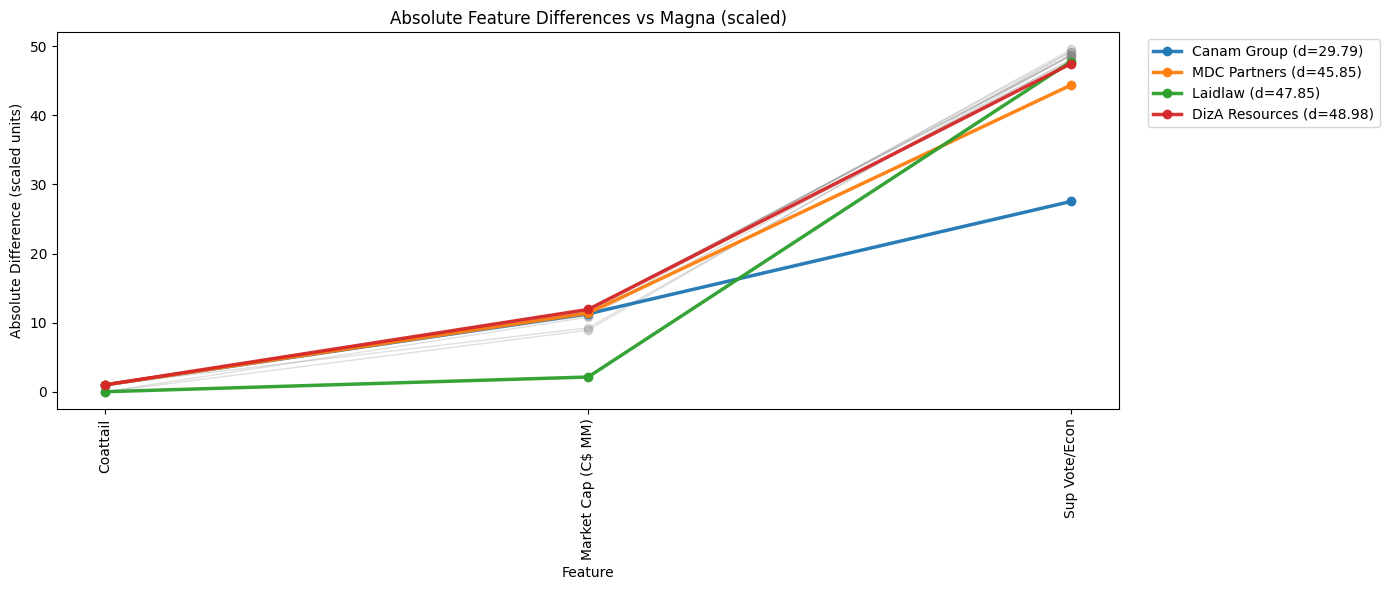

Nearest to Magna by L2 distance (scaled features):
 1. Canam Group           dist=29.787
 2. MDC Partners          dist=45.848
 3. Laidlaw               dist=47.848
 4. DizA Resources        dist=48.981
 5. Goldcorp              dist=49.297
 6. Agra                  dist=49.396
 7. MDS Inc.              dist=49.679
 8. ProMetic Life Sciences  dist=50.045
 9. Extendicare           dist=50.051
10. CoolBrands            dist=50.094
11. Slater Steel          dist=50.216
12. Sino-Forest           dist=50.591
13. Gildan                dist=50.771


In [1174]:
# --- Absolute differences vs Magna (in scaled feature space) ---
# Make sure MAGNA_SCALED is a single-row DataFrame aligned to X.columns (you already have this)
magna_vec = MAGNA_SCALED.iloc[0]  # Series with same index as X.columns

# Row-wise subtract + abs (broadcast Magna's row across all companies)
abs_diffs = X_scaled.sub(magna_vec, axis=1).abs()   # shape: (n_companies, n_features)

# Compute overall distances (L2) to Magna to rank neighbors
l2_dist = (abs_diffs.pow(2).sum(axis=1)).pow(0.5)   # Series indexed like data
neighbor_rank = l2_dist.sort_values()

# Pick how many nearest neighbors to highlight
TOP_K = 4
topk_idx = neighbor_rank.index[:TOP_K]

# --- Plot: spaghetti lines by feature, highlight nearest neighbors ---
fig, ax = plt.subplots(figsize=(14, 6))

# Plot all companies faintly
for idx in abs_diffs.index:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=1, alpha=0.25, color="gray")

# Highlight the TOP_K nearest neighbors with labels
for idx in topk_idx:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=2.5, alpha=0.95,
            label=f"{data.loc[idx, 'Company']} (d={neighbor_rank.loc[idx]:.2f})")

ax.set_title("Absolute Feature Differences vs Magna (scaled)")
ax.set_xlabel("Feature")
ax.set_ylabel("Absolute Difference (scaled units)")  
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# print the neighbor ordering with distances 
print("Nearest to Magna by L2 distance (scaled features):")
for i, (idx, d) in enumerate(neighbor_rank.items(), start=1):
    print(f"{i:2d}. {data.loc[idx, 'Company']:<20}  dist={d:.3f}")


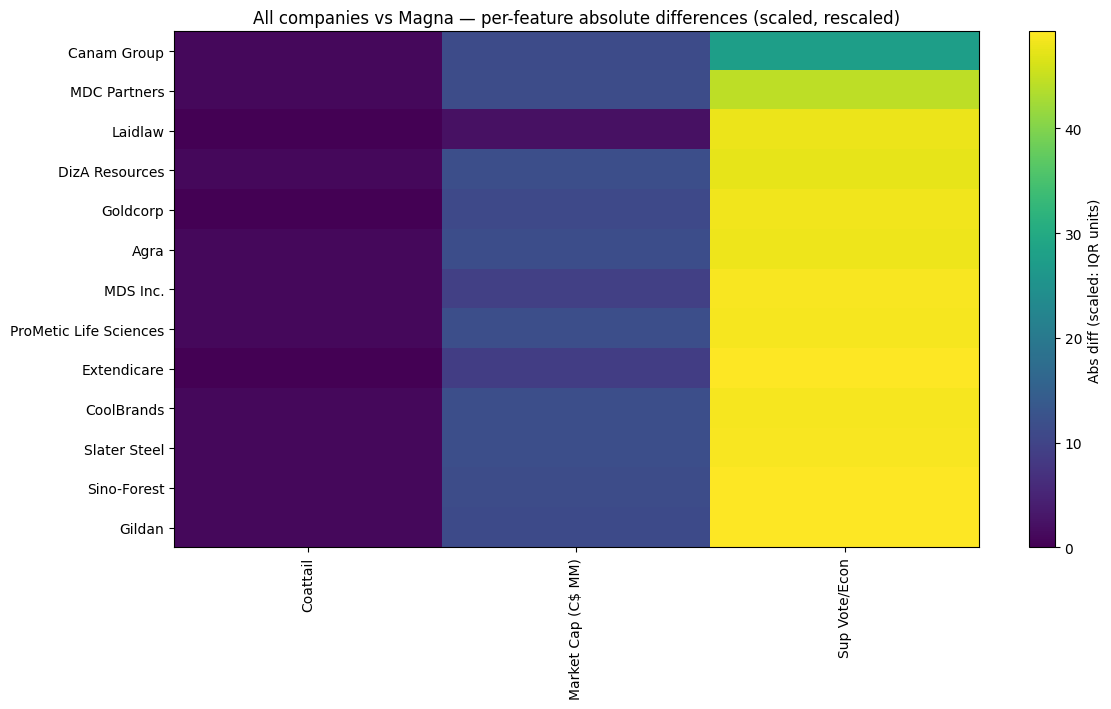

In [1175]:
# Order ALL companies by L2 distance to Magna (you already have neighbor_rank)
order_idx = list(neighbor_rank.index)

# (Optional) drop Magna's own row (all zeros) from the display
order_idx = [i for i in order_idx if data.loc[i, "Company"] != "Magna"]

# Choose the data to plot
to_plot = abs_diffs.loc[order_idx, abs_diffs.columns]  # per-feature abs diffs vs Magna

# Color scale: cap at 95th percentile so tiny values show up
vmax = to_plot.stack().quantile(0.95)
vmin = 0.0

# Heatmap
fig, ax = plt.subplots(figsize=(12, 0.4 * len(order_idx) + 2))
im = ax.imshow(to_plot, aspect="auto", vmin=vmin, vmax=vmax, cmap="viridis")

ax.set_yticks(range(len(order_idx)))
ax.set_yticklabels(data.loc[order_idx, "Company"])
ax.set_xticks(range(len(to_plot.columns)))
ax.set_xticklabels(to_plot.columns, rotation=90)

ax.set_title("All companies vs Magna — per-feature absolute differences (scaled, rescaled)")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Abs diff (scaled: IQR units)")
plt.tight_layout()
plt.show()


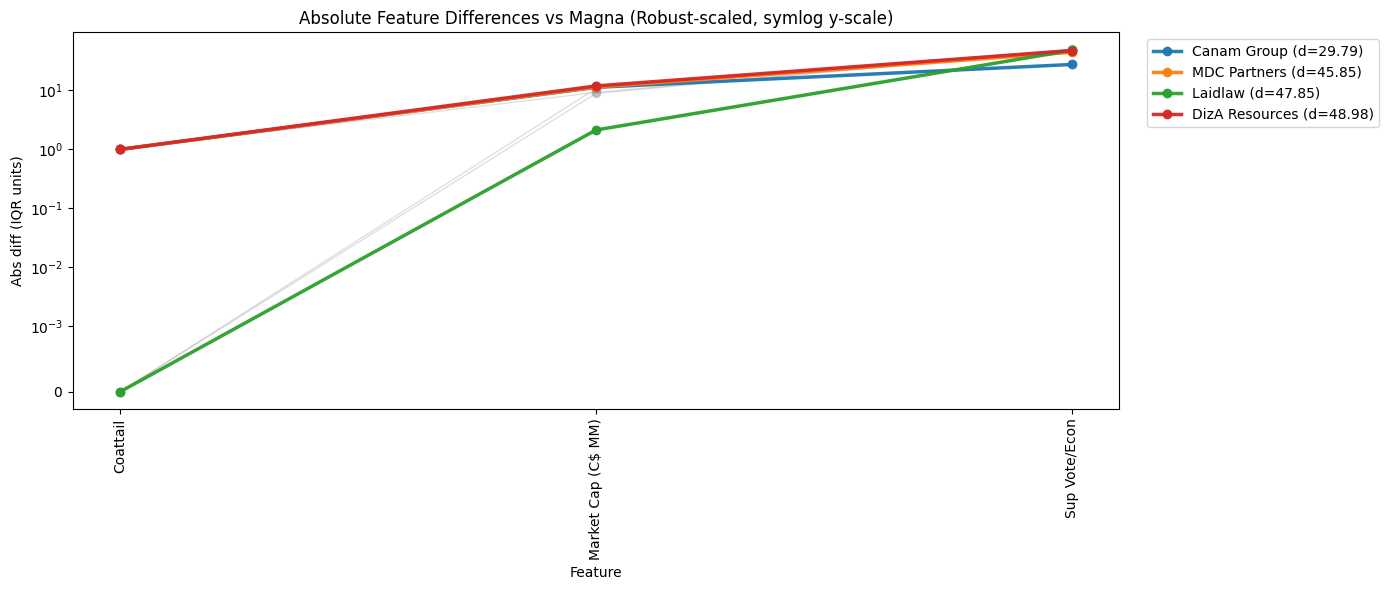

In [1176]:
fig, ax = plt.subplots(figsize=(14, 6))
for idx in abs_diffs.index:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=1, alpha=0.25, color="gray")
for idx in topk_idx:
    ax.plot(abs_diffs.columns, abs_diffs.loc[idx].values,
            marker="o", linewidth=2.5, alpha=0.95,
            label=f"{data.loc[idx, 'Company']} (d={neighbor_rank.loc[idx]:.2f})")

ax.set_yscale("symlog", linthresh=1e-3)   # or "log" if you prefer
ax.set_title("Absolute Feature Differences vs Magna (Robust-scaled, symlog y-scale)")
ax.set_xlabel("Feature")
ax.set_ylabel("Abs diff (IQR units)")
plt.xticks(rotation=90); plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(); plt.show()


In [1177]:
X_scaled["Company"] = data["Company"]

In [1178]:
X_scaled

,Coattail,Market Cap (C$ MM),Sup Vote/Econ,Company
0,-1.0,2.465909,-0.65,Extendicare
1,0.0,0.105519,21.05,Canam Group
2,0.0,-0.511364,-0.05,CoolBrands
3,0.0,-0.509740,0.00,ProMetic Life Sciences
4,0.0,-0.525974,1.10,DizA Resources
5,0.0,0.000000,4.20,MDC Partners
6,0.0,0.365260,-0.95,Gildan
7,0.0,-0.142857,-0.65,Sino-Forest
8,-1.0,0.589286,0.50,Goldcorp
9,0.0,2.137987,-0.20,MDS Inc.


In [1179]:
MAGNA_SCALED

,Coattail,Market Cap (C$ MM),Sup Vote/Econ
0,-1.0,11.386364,48.6
